In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#load the data 
tgt_df = pd.read_csv('TGT_14_19.csv')

In [3]:
tgt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-17,60.930000,60.930000,59.869999,60.240002,47.091560,8132100
1,2014-01-21,59.799999,59.810001,58.799999,59.200001,46.278553,10595500
2,2014-01-22,59.779999,59.820000,58.750000,58.980000,46.106571,7185100
3,2014-01-23,58.500000,58.720001,58.259998,58.650002,45.848598,7029900
4,2014-01-24,58.560001,58.599998,57.689999,57.720001,45.121593,7467500


In [4]:
#Inspect it 
print(tgt_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-01-17  60.930000  60.930000  59.869999  60.240002  47.091560   
1     2014-01-21  59.799999  59.810001  58.799999  59.200001  46.278553   
2     2014-01-22  59.779999  59.820000  58.750000  58.980000  46.106571   
3     2014-01-23  58.500000  58.720001  58.259998  58.650002  45.848598   
4     2014-01-24  58.560001  58.599998  57.689999  57.720001  45.121593   
...          ...        ...        ...        ...        ...        ...   
1253  2019-01-10  67.949997  68.330002  66.529999  68.290001  63.058548   
1254  2019-01-11  68.300003  70.040001  68.059998  69.610001  64.277420   
1255  2019-01-14  69.150002  69.849998  68.629997  68.839996  63.566418   
1256  2019-01-15  68.760002  68.760002  67.800003  68.209999  62.984692   
1257  2019-01-16  68.059998  68.629997  67.599998  67.849998  62.652256   

        Volume  
0      8132100  
1     10595500  
2      7185100  
3      7029900  
4      7467500

In [5]:
#print the summary 
print(tgt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     69.704913    70.347234    69.038871    69.695159    59.230672   
std       9.593444     9.667393     9.518827     9.576548     9.042972   
min      50.230000    50.779999    48.560001    50.180000    43.049992   
25%      60.564999    61.075000    60.007500    60.562501    50.101396   
50%      70.890000    71.639999    70.055001    70.885002    60.231355   
75%      77.377499    78.187502    76.725002    77.379999    65.459221   
max      89.400002    90.389999    88.919998    89.260002    81.744019   

             Volume  
count  1.258000e+03  
mean   5.781392e+06  
std    3.621091e+06  
min    1.097700e+06  
25%    3.842800e+06  
50%    4.876400e+06  
75%    6.671425e+06  
max    4.949170e+07  


In [6]:
# load data set 2
tgt_df2 = pd.read_csv('TGT_2020_2022.csv')

In [7]:
tgt_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,116.489998,117.790001,116.169998,116.919998,111.402405,7303800
1,2020-01-21,116.660004,116.660004,113.820000,114.040001,108.658325,8188000
2,2020-01-22,114.139999,115.080002,113.769997,113.900002,108.524925,5070600
3,2020-01-23,113.529999,115.570000,113.099998,115.529999,110.077995,4641500
4,2020-01-24,116.000000,116.000000,113.639999,114.320000,108.925110,4338900


In [8]:
#Inspect the 2020-2022
print(tgt_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-17  116.489998  117.790001  116.169998  116.919998  111.402405   
1    2020-01-21  116.660004  116.660004  113.820000  114.040001  108.658325   
2    2020-01-22  114.139999  115.080002  113.769997  113.900002  108.524925   
3    2020-01-23  113.529999  115.570000  113.099998  115.529999  110.077995   
4    2020-01-24  116.000000  116.000000  113.639999  114.320000  108.925110   
..          ...         ...         ...         ...         ...         ...   
648  2022-08-15  171.830002  174.160004  170.199997  173.389999  172.309998   
649  2022-08-16  177.110001  183.889999  175.559998  180.190002  180.190002   
650  2022-08-17  174.160004  177.990005  170.830002  175.339996  175.339996   
651  2022-08-18  173.979996  175.139999  171.580002  173.050003  173.050003   
652  2022-08-19  171.830002  171.919998  166.789993  167.039993  167.039993   

       Volume  
0     7303800  
1     8188000  
2  

In [9]:
#print the summary 
print(tgt_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  653.000000  653.000000  653.000000  653.000000  653.000000   
mean   183.474472  185.639127  181.455268  183.534656  179.512564   
std     49.512496   49.643795   49.239492   49.417289   49.441926   
min     91.389999   94.129997   90.169998   91.040001   87.237373   
25%    145.779999  147.960007  143.600006  146.029999  143.619827   
50%    184.490005  187.580002  180.110001  183.580002  179.940475   
75%    228.000000  229.570007  225.369995  227.559998  224.104523   
max    264.549988  268.980011  262.739990  266.390015  262.506409   

             Volume  
count  6.530000e+02  
mean   4.298958e+06  
std    3.462487e+06  
min    1.598800e+06  
25%    2.767600e+06  
50%    3.444700e+06  
75%    4.677900e+06  
max    5.093680e+07  


In [10]:
#now prep the data for 2014-2019
tgt_df.set_index(pd.DatetimeIndex(tgt_df['Date']), inplace=True)

In [11]:
#now prep the data for 2020-2022
tgt_df2.set_index(pd.DatetimeIndex(tgt_df2['Date']), inplace=True)

In [12]:
#Keep the close for 2014-19
tgt_df = tgt_df[['Close']]

In [13]:
print(tgt_df)

                Close
Date                 
2014-01-17  60.240002
2014-01-21  59.200001
2014-01-22  58.980000
2014-01-23  58.650002
2014-01-24  57.720001
...               ...
2019-01-10  68.290001
2019-01-11  69.610001
2019-01-14  68.839996
2019-01-15  68.209999
2019-01-16  67.849998

[1258 rows x 1 columns]


In [14]:
#Keep the close 2020-22
tgt_df2 = tgt_df2[['Close']]

In [15]:
print(tgt_df2)

                 Close
Date                  
2020-01-17  116.919998
2020-01-21  114.040001
2020-01-22  113.900002
2020-01-23  115.529999
2020-01-24  114.320000
...                ...
2022-08-15  173.389999
2022-08-16  180.190002
2022-08-17  175.339996
2022-08-18  173.050003
2022-08-19  167.039993

[653 rows x 1 columns]


In [16]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
tgt_df['Actual Prediction'] = tgt_df[['Close']].shift(-prediction_days)


In [17]:
#print the new column for 2014-19
tgt_df

,Close,Actual Prediction
Date,,
2014-01-17,60.240002,68.809998
2014-01-21,59.200001,68.239998
2014-01-22,58.980000,68.620003
2014-01-23,58.650002,67.690002
2014-01-24,57.720001,67.879997
...,...,...
2019-01-10,68.290001,NaN
2019-01-11,69.610001,NaN
2019-01-14,68.839996,NaN


In [18]:
# Create independent dataset X and create a numpy array
X=X = np.array(tgt_df[['Close']])

In [19]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [20]:
#Creat the dependetnt data for Y
Y=tgt_df['Actual Prediction'].values


In [21]:
Y=Y[:-prediction_days]
# print(Y)

In [22]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [23]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

LinearRegression()

In [24]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

0.028535054928724324


In [25]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(tgt_df[['Close']])[-prediction_days:]
# acutal_days

In [26]:
#print the liner regression prediction  for the next 52 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [28]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(tgt_df2[['Close']])
# actual_20_22

In [29]:
linear_prediction.shape

(599,)

In [30]:
actual_20_22.shape 

(653, 1)

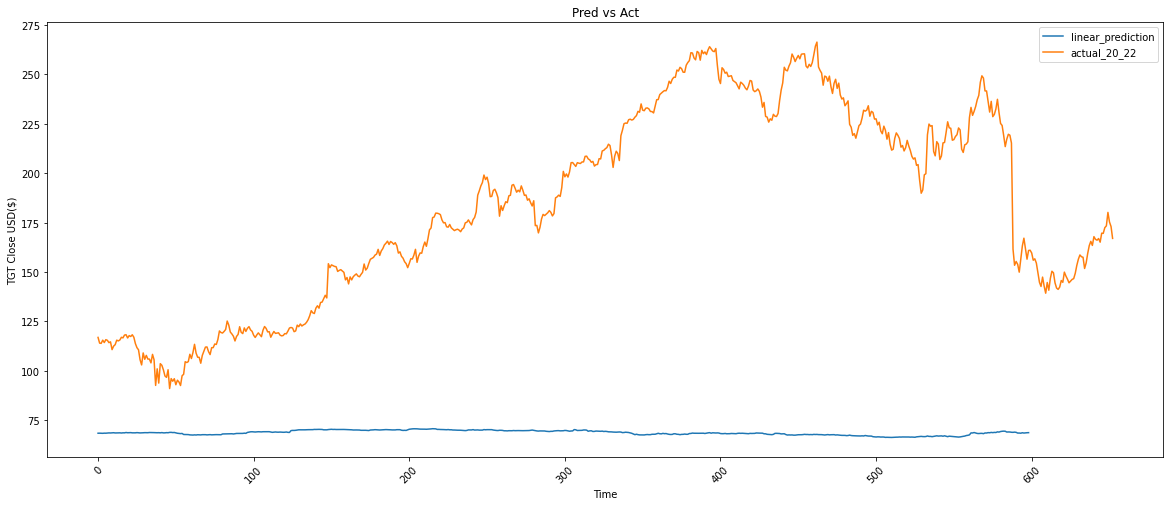

In [31]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('TGT Close USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()